In [60]:
import pandas as pd
import csv
import json
from shapely.geometry import shape
import pprint
from flask import Flask
from sqlalchemy import create_engine
from geojson import Feature, FeatureCollection, Polygon, MultiPolygon
from collections import OrderedDict
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

In [61]:
stategeo_df = pd.read_csv("Raw Data/state_geojson.csv")
stategeo_df.head()

,type,properties,geometry
0,Feature,"{'GEO_ID': '0400000US23', 'STATE': '23', 'NAME...","{'type': 'MultiPolygon', 'coordinates': [[[[-6..."
1,Feature,"{'GEO_ID': '0400000US25', 'STATE': '25', 'NAME...","{'type': 'MultiPolygon', 'coordinates': [[[[-7..."
2,Feature,"{'GEO_ID': '0400000US26', 'STATE': '26', 'NAME...","{'type': 'MultiPolygon', 'coordinates': [[[[-8..."
3,Feature,"{'GEO_ID': '0400000US30', 'STATE': '30', 'NAME...","{'type': 'Polygon', 'coordinates': [[[-104.057..."
4,Feature,"{'GEO_ID': '0400000US32', 'STATE': '32', 'NAME...","{'type': 'Polygon', 'coordinates': [[[-114.050..."


In [62]:
state = ['Maine', 'Massachusetts', 'Michigan', 'Montana', 'Nevada', 'New Jersey', 'New York', 'North Carolina', 'Ohio', 'Pennsylvania', 'Rhode Island', 'Tennessee', 'Texas', 'Utah', 
'Washington', 'Wisconsin', 'Puerto Rico', 'Maryland', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Lousiana', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire', 
'New Mexico', 'North Dakota', 'Oklahoma', 'Oregon', 'South Carolina', 'South Dakota', 'Vermont', 'Virginia', 'West Virginia', 'Wyoming']

In [63]:
stategeo_df['NAME'] = state
stategeo_df.head()

,type,properties,geometry,NAME
0,Feature,"{'GEO_ID': '0400000US23', 'STATE': '23', 'NAME...","{'type': 'MultiPolygon', 'coordinates': [[[[-6...",Maine
1,Feature,"{'GEO_ID': '0400000US25', 'STATE': '25', 'NAME...","{'type': 'MultiPolygon', 'coordinates': [[[[-7...",Massachusetts
2,Feature,"{'GEO_ID': '0400000US26', 'STATE': '26', 'NAME...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",Michigan
3,Feature,"{'GEO_ID': '0400000US30', 'STATE': '30', 'NAME...","{'type': 'Polygon', 'coordinates': [[[-104.057...",Montana
4,Feature,"{'GEO_ID': '0400000US32', 'STATE': '32', 'NAME...","{'type': 'Polygon', 'coordinates': [[[-114.050...",Nevada


In [64]:
state_df = pd.read_csv("Raw Data/state_data.csv", encoding="utf-8")
state_df.head()

,state,NAME,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,cases,deaths,TotalPop,VotingAgeCitizen,Men %,...,Hispanic %,White %,Black %,Native %,Asian %,Pacific %,Biden %,Trump %,Republican,Democrat
0,AK,Alaska,260983,148624,102080,16705,83,738565,530553,0.523067,...,0.054854,0.521503,0.012701,0.340637,0.064436,0.005868,0.391137,0.569478,True,False
1,AL,Alabama,2309900,1434159,843473,193985,2973,4850771,3651914,0.484625,...,0.033495,0.661761,0.291164,0.006169,0.007229,0.000182,0.365156,0.620875,True,False
2,AR,Arkansas,1209372,757052,418051,113057,1958,2977944,2183895,0.490826,...,0.051857,0.770472,0.164333,0.005501,0.007049,0.000788,0.345676,0.625988,True,False
3,AZ,Arizona,3366867,1651812,1663447,247473,5979,6809946,4690177,0.497075,...,0.314592,0.517689,0.018469,0.134786,0.013173,0.001290,0.494064,0.490608,False,True
4,CA,California,16092730,5416035,10339137,935878,17671,38982847,24970109,0.496797,...,0.310681,0.565784,0.030425,0.017047,0.073052,0.003010,0.642473,0.336552,False,True


In [65]:
state_df['hispanic_pop'] = round(state_df['TotalPop']*state_df['Hispanic %'])

state_df['white_pop'] = round(state_df['TotalPop']*state_df['White %'])

state_df['black_pop'] = round(state_df['TotalPop']*state_df['Black %'])

state_df['native_pop'] = round(state_df['TotalPop']*state_df['Native %'])

state_df['asian_pop'] = round(state_df['TotalPop']*state_df['Asian %'])

state_df['pacific_pop'] = round(state_df['TotalPop']*state_df['Pacific %'])

In [66]:
merged_df = pd.merge(stategeo_df, state_df, on="NAME")
merged_df.head()
clean_state_df = merged_df.drop(['state'],axis=1)

clean_state_df["cases_per_100k"]= (clean_state_df["cases"]/clean_state_df["TotalPop"])*100000
clean_state_df["deaths_per_100k"]= (clean_state_df["deaths"]/clean_state_df["TotalPop"])*100000


clean_state_df.head()

,type,properties,geometry,NAME,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,cases,deaths,TotalPop,...,Republican,Democrat,hispanic_pop,white_pop,black_pop,native_pop,asian_pop,pacific_pop,cases_per_100k,deaths_per_100k
0,Feature,"{'GEO_ID': '0400000US23', 'STATE': '23', 'NAME...","{'type': 'MultiPolygon', 'coordinates': [[[[-6...",Maine,786337,341949,420357,6711,147,1330158,...,False,True,19145.0,1279415.0,10504.0,10420.0,10504.0,169.0,504.526530,11.051319
1,Feature,"{'GEO_ID': '0400000US25', 'STATE': '25', 'NAME...","{'type': 'MultiPolygon', 'coordinates': [[[[-7...",Massachusetts,3482216,1131042,2271763,159707,10013,6789319,...,False,True,630365.0,5455488.0,399548.0,20027.0,282388.0,1502.0,2352.327236,147.481655
2,Feature,"{'GEO_ID': '0400000US26', 'STATE': '26', 'NAME...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",Michigan,5531329,2647004,2795649,197406,7699,9925568,...,False,True,351495.0,8949166.0,393596.0,128261.0,101336.0,1713.0,1988.863509,77.567349
3,Feature,"{'GEO_ID': '0400000US30', 'STATE': '30', 'NAME...","{'type': 'Polygon', 'coordinates': [[[-104.057...",Montana,602781,341765,243716,33495,376,1029862,...,True,False,30486.0,910095.0,2328.0,81715.0,4918.0,319.0,3252.377503,36.509746
4,Feature,"{'GEO_ID': '0400000US32', 'STATE': '32', 'NAME...","{'type': 'Polygon', 'coordinates': [[[-114.050...",Nevada,1337217,635017,671887,101477,1781,2887725,...,False,True,510752.0,2132180.0,64538.0,113809.0,59854.0,6593.0,3514.081154,61.674848


In [67]:
# #new_df = pd.DataFrame(clean_state_df.geometry.str.split(',',1).tolist(), 
#                          #columns = ['type','coordinates'])

clean_state_df['geometry'] = clean_state_df['geometry'].str.replace("'",'"') 
# new_df['type'] = new_df['type'].str.split(':').str[1]
# new_df['type'] = new_df['type'].str.replace("'",'') 

#clean_state_df['geometry'] = clean_state_df['geometry'].str.replace('}','') 
# new_df['coordinates'] = new_df['coordinates'].str.split(':').str[1]


clean_state_df.head()

,type,properties,geometry,NAME,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,cases,deaths,TotalPop,...,Republican,Democrat,hispanic_pop,white_pop,black_pop,native_pop,asian_pop,pacific_pop,cases_per_100k,deaths_per_100k
0,Feature,"{'GEO_ID': '0400000US23', 'STATE': '23', 'NAME...","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-6...",Maine,786337,341949,420357,6711,147,1330158,...,False,True,19145.0,1279415.0,10504.0,10420.0,10504.0,169.0,504.526530,11.051319
1,Feature,"{'GEO_ID': '0400000US25', 'STATE': '25', 'NAME...","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-7...",Massachusetts,3482216,1131042,2271763,159707,10013,6789319,...,False,True,630365.0,5455488.0,399548.0,20027.0,282388.0,1502.0,2352.327236,147.481655
2,Feature,"{'GEO_ID': '0400000US26', 'STATE': '26', 'NAME...","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-8...",Michigan,5531329,2647004,2795649,197406,7699,9925568,...,False,True,351495.0,8949166.0,393596.0,128261.0,101336.0,1713.0,1988.863509,77.567349
3,Feature,"{'GEO_ID': '0400000US30', 'STATE': '30', 'NAME...","{""type"": ""Polygon"", ""coordinates"": [[[-104.057...",Montana,602781,341765,243716,33495,376,1029862,...,True,False,30486.0,910095.0,2328.0,81715.0,4918.0,319.0,3252.377503,36.509746
4,Feature,"{'GEO_ID': '0400000US32', 'STATE': '32', 'NAME...","{""type"": ""Polygon"", ""coordinates"": [[[-114.050...",Nevada,1337217,635017,671887,101477,1781,2887725,...,False,True,510752.0,2132180.0,64538.0,113809.0,59854.0,6593.0,3514.081154,61.674848


In [68]:
clean_state_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  49 non-null     object 
 1   properties            49 non-null     object 
 2   geometry              49 non-null     object 
 3   NAME                  49 non-null     object 
 4   total_votes20         49 non-null     int64  
 5   votes20_Donald_Trump  49 non-null     int64  
 6   votes20_Joe_Biden     49 non-null     int64  
 7   cases                 49 non-null     int64  
 8   deaths                49 non-null     int64  
 9   TotalPop              49 non-null     int64  
 10  VotingAgeCitizen      49 non-null     int64  
 11  Men %                 49 non-null     float64
 12  Women %               49 non-null     float64
 13  Hispanic %            49 non-null     float64
 14  White %               49 non-null     float64
 15  Black %               49 

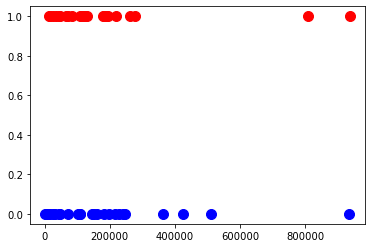

In [79]:
for (v, c) in [(False, 'b'), (True, 'r')]:
    plt.scatter(clean_state_df.cases[clean_state_df.Republican == v], clean_state_df.Republican[clean_state_df.Republican == v], s=100, c=c)

In [47]:
# merged_df = pd.merge(new_df, clean_state_df, left_index=True, right_index=True)
# final_df = merged_df.drop(['type_y', 'properties', 'geometry'], axis=1)
# final_df.head()

In [48]:
# final_df['type_x'] = final_df['type_x'].str.replace(' ', '')
# final_df['coordinates'] = final_df['coordinates'].str.replace(' ', '')
# final_df.columns = final_df.columns.str.replace(' ', '')
# final_df.columns = final_df.columns.str.replace('%', '')

#clean_state_df.to_csv('new_csv.csv')

In [49]:
# def split_and_convert(s):
#     bits = s[1:-1].split(',')
#     return (
#         int(bits[0]), bits[1], float(bits[2]),
#         float(bits[3]), float(bits[4]), float(bits[5])
#     )
# data_to_dump = [split_and_convert(s) for s in data]
# json.dumps(data_to_dump)

In [50]:
# li = []

# with open('new_csv.csv', 'r') as csvfile:
#     reader = csv.reader(csvfile, delimiter=',')
#     for geometry, NAME, total_votes20, votes20_Donald_Trump, votes20_Joe_Biden, cases, deaths, TotalPop, VotingAgeCitizen, Men, Women, Hispanic, White, Black, Native, Asian, Pacific, Biden, Trump, Republican, Democrat, hispanic_pop, white_pop, black_pop, native_pop, asian_pop, pacific_pop, cases_per_100k, deaths_per_100k in reader:
#         d = OrderedDict()
#         d['type'] = 'Feature'
#         d['geometry'] = geometry
#         d['properties'] = {
#             'state': NAME,
#             'total_votes20': total_votes20,
#             'votes20_Donald_Trump': votes20_Donald_Trump,
#             'votes20_Joe_Biden': votes20_Joe_Biden,
#             'cases': cases,
#             'deaths': deaths,
#             'TotalPop': TotalPop,
#             'VotingAgeCitizen': VotingAgeCitizen,
#             'Men %': Men,
#             'Women %': Women,
#             'Hispanic %': Hispanic,
#             'White %': White,
#             'Black %': Black,
#             'Native %': Native,
#             'Asian %': Asian,
#             'Pacific %': Pacific,
#             'Biden %': Biden,
#             'Trump %': Trump,
#             'Republican': Republican,
#             'Democrat': Democrat,
#             'hispanic_pop': hispanic_pop,
#             'white_pop': white_pop,
#             'black_pop': black_pop,
#             'native_pop': native_pop,
#             'asian_pop': asian_pop,
#             'pacific_pop': pacific_pop,
#             'cases_per_100k': cases_per_100k,
#             'deaths_per_100k': deaths_per_100k
#             }
#         li.append(d)
         
# d = OrderedDict()
# d['type'] = 'FeatureCollection'
# d['features'] = features
# with open('GeoObs.json', 'w') as f:
#     f.write(json.dumps(d, sort_keys=False, indent=4))

In [51]:
# li = []
# with open('new_csv.csv', newline='') as csvfile:
#     reader = csv.DictReader(csvfile)
#     for row in reader:
#         li.append({
#            "type": "Feature",
#            "geometry": float(row[geometry]),
#            "geo": {
#                 "__type": "GeoPoint",
#                 "latitude": float(row["latitude"]),
#                 "longitude": float(row["longitude"]),
#             }
#         })
# json.dump(li,open('file.json','w'),indent=4,sort_keys=False)

In [52]:
# #for i in range(0, len(final_df['coordinates'])): 
#     #final_df['coordinates'][i] = int(float(final_df['coordinates'][i])) 

# for _, row in clean_state_df.iterrows():

#     feature = {"type": "Feature", "geometry": row['geometry'], "properties": {"state": row['NAME'], "total_votes20": row['total_votes20'], "votes20_Donald_Trump": row['votes20_Donald_Trump'], "votes20_Joe_Biden": row['votes20_Joe_Biden'], "cases": row['cases'], "deaths": row['deaths'], "TotalPop": row['TotalPop'], 'VotingAgeCitizen': row['VotingAgeCitizen'], "Men": row['Men %'],
#     "Women": row['Women %'], 'Hispanic %': row['Hispanic %'], 'White %': row['White %'], 'Black %': row['Black %'], 'Native %': row['Native %'], 'Asian %': row['Asian %'], 'Pacific %': row['Pacific %'], 'Biden %': row['Biden %'], 'Trump %': row['Trump %'], 'Republican': row['Republican'], 'Democrat': row['Democrat'], 'hispanic_pop': row['hispanic_pop'], 'white_pop': row['white_pop'], 'black_pop': row['black_pop'], 'native_pop': row['native_pop'], 'asian_pop': row['asian_pop'], 'pacific_pop': row['pacific_pop'], 'cases_per_100k': row['cases_per_100k'], 'deaths_per_100k': row['deaths_per_100k']}
# }

#     geojson['features'].append(feature)

# with open('new.geojson', 'w') as fp:
#     (json.dump(geojson, fp)) 


In [53]:
def df_to_geojson(clean_state_df):
    geojson = {'type':'FeatureCollection', 'features':[]}
    for _, row in clean_state_df.iterrows():

        geometry = json.loads(row['geometry'])

        feature = { 'type':'Feature',
                    'geometry': geometry,
                   'properties': {"state": row['NAME'], "total_votes20": row['total_votes20'], "votes20_Donald_Trump": row['votes20_Donald_Trump'], "votes20_Joe_Biden": row['votes20_Joe_Biden'], "cases": row['cases'], "deaths": row['deaths'], "TotalPop": row['TotalPop'], 'VotingAgeCitizen': row['VotingAgeCitizen'], "Men": row['Men %'],
    "Women": row['Women %'], 'Hispanic': row['Hispanic %'], 'White': row['White %'], 'Black': row['Black %'], 'Native': row['Native %'], 'Asian': row['Asian %'], 'Pacific': row['Pacific %'], 'Biden': row['Biden %'], 'Trump': row['Trump %'], 'Republican': row['Republican'], 'Democrat': row['Democrat'], 'hispanic_pop': row['hispanic_pop'], 'white_pop': row['white_pop'], 'black_pop': row['black_pop'], 'native_pop': row['native_pop'], 'asian_pop': row['asian_pop'], 'pacific_pop': row['pacific_pop'], 'cases_per_100k': row['cases_per_100k'], 'deaths_per_100k': row['deaths_per_100k']}
        }
        #print({ "geometry": {row.geometry['coordinates']}} )
        #feature['geometry']['coordinates'] = [row[lon],row[lat]]
        #for prop in properties:
            #feature['properties'][prop] = row[prop]
        geojson['features'].append(feature)

    return geojson

In [54]:
#cols = ['street_address', 'issue_type', 'status']
#df_to_geojson(clean_state_df)

In [55]:
#output_filename = 'data.geojson'
#with open(output_filename, 'w') as output_file:
#    json.dump(geojson, output_file, indent=2) 

#print(geojson)

In [56]:
## Create PostgreSQL RDS Database Connection
# conn_string = "postgres:{pwd}@project2.cy7mfzyzcf0j.us-east-2.rds.amazonaws.com:5432/project2db"
# engine = create_engine(f'postgresql://{conn_string}')
# Check table names
# engine.table_names()
# import csv
# with open('state_data.csv') as csvfile:
#     myCSVReader = csv.DictReader(csvfile)
#     change names in placeholder to match names in csv file.
#     sql = """INSERT INTO State(index,type,coordinates,state,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,cases,deaths,TotalPop,VotingAgeCitizen,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Biden,Trump,Republican,Democrat,hispanic_pop,white_pop,black_pop,native_pop,asian_pop,pacific_pop,cases_per_100k,deaths_per_100k
# )
#           VALUES (%(index)s,%(type)s,%(coordinates)s,%(state)s,%(total_votes20)s,%(votes20_Donald_Trump)s,%(votes20_Joe_Biden)s,%(cases)s,%(deaths)s,%(TotalPop)s, %(VotingAgeCitizen)s,%(Men)s,%(Women)s, %(Hispanic)s,%(White)s,%(Black)s, %(Native)s,%(Asian)s,%(Pacific)s, %(Biden)s,%(Trump)s,%(Republican)s, %(Democrat)s,%(hispanic_pop)s,%(white_pop)s, %(black_pop)s,%(native_pop)s,%(asian_pop)s, %(pacific_pop)s,%(cases_per_100k)s,%(deaths_per_100k)s)"""
#     for row in myCSVReader:
#         use row directly
#         engine.execute(sql, row)
#pd.read_sql_query('select * from state', con=engine).head()

In [57]:
#final_df.to_csv('state_data.csv')